## Agglomerative Clustering

*Agglomerative clustering* refers to a collection of clustering algorithms that all build upon the same principles: the algorithm starts by declaring each point its own cluster, and then merges the two most similar clusters until some stopping criterion is satisfied. 

The stopping criterion implemented in scikit-learn is the number of clusters, so similar clusters are merged until only the specified number of clusters are left. There are several linkage criteria that specify how exactly the “most similar cluster” is measured. This measure is always defined between two existing clusters.

The following three choices are implemented in scikit-learn:

- ward = The default choice, ward picks the two clusters to merge such that the variance within all clusters increases the least. This often leads to clusters that are relatively equally sized.
    
- average = *average* linkage merges the two clusters that have the smallest average distance between all their points.
    
- complete = *complete* linkage (also known as maximum linkage) merges the two clusters that have the smallest maximum distance between their points.

*ward* works on most datasets, and we will use it in our examples. If the clusters have very dissimilar numbers of members (if one is much bigger than all the others, for example), *average* or *complete* might work better.

The following plot illustrates the progression of agglomerative clustering on a two-dimensional data set, looking for 3 clusters:

In [1]:
# Standard imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp
import sklearn
from IPython.display import display
import mglearn

# Don't display deprecation warnings
import warnings
warnings.filterwarnings('ignore')

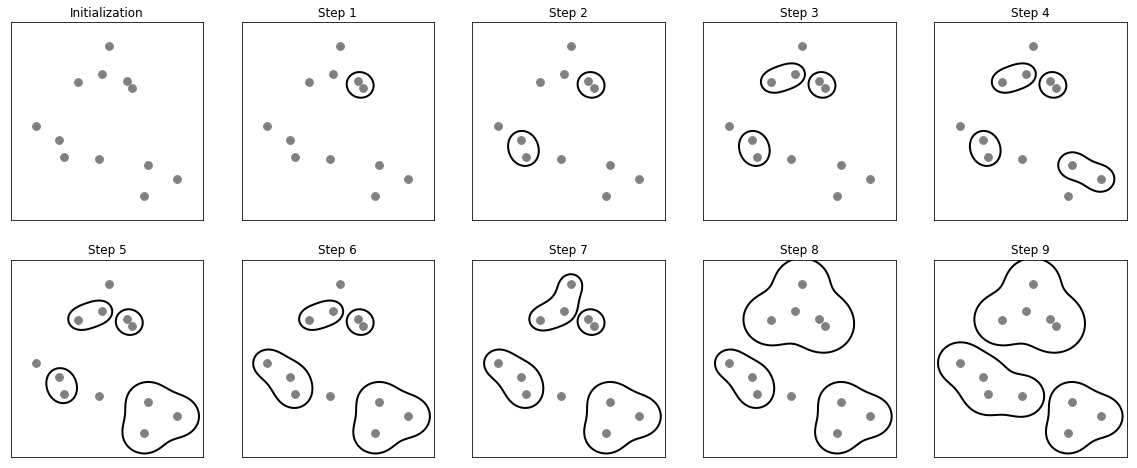

In [2]:
mglearn.plots.plot_agglomerative_algorithm()

Initially, each point is its own cluster. Then, in each step, the two clusters that are closest are merged. In the first four steps, two single-point clusters are picked and these are joined into two-point clusters. In step 5, one of the two-point clusters is extended to a third point, and so on. In step 9, there are only three clusters remaining. As we specified that we are looking for three clusters, the algorithm then stops.

Let’s have a look at how agglomerative clustering performs on the simple three-cluster data we used here.  Because of the way the algorithm works, agglomerative clustering cannot make predictions for new data points.  Therefore, *AgglomerativeClustering* has no *predict* method.  To build the model and get the cluster memberships on the training set, use the *fit_predict* method instead.  

The result is shown here:

Text(0, 0.5, 'Feature 1')

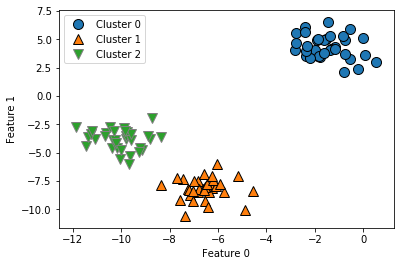

In [4]:
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering

X, y = make_blobs(random_state=1)

agg = AgglomerativeClustering(n_clusters=3)
assignment = agg.fit_predict(X)

mglearn.discrete_scatter(X[:, 0], X[:, 1], assignment)
plt.legend(["Cluster 0", "Cluster 1", "Cluster 2"], loc="best")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

As expected, the algorithm recovers the clustering perfectly. While the scikit-learn implementation of agglomerative clustering requires you to specify the number of clusters you want the algorithm to find, agglomerative clustering methods provide some help with choosing the right number, which we will discuss next.

### Hierarchical Clustering and Dendograms

Agglomerative clustering produces what is known as a hierarchical clustering. The clustering proceeds iteratively, and every point makes a journey from being a single point cluster to belonging to some final cluster. Each intermediate step provides a clustering of the data (with a different number of clusters). It is sometimes helpful to look at all possible clusterings jointly. 

The next example shows an overlay of all the possible clusterings, providing some insight into how each cluster breaks up into smaller clusters:

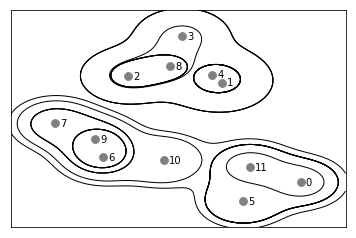

In [5]:
mglearn.plots.plot_agglomerative()

While this visualization provides a very detailed view of the hierarchical clustering, it relies on the two-dimensional nature of the data and therefore cannot be used on datasets that have more than two features. There is, however, another tool to visualize hierarchical clustering, called a *dendrogram*, that can handle multidimensional datasets.

Unfortunately, scikit-learn currently does not have the functionality to draw dendrograms. However, you can generate them easily using SciPy. The SciPy clustering algorithms have a slightly different interface to the scikit-learn clustering algorithms. SciPy provides a function that takes a data array X and computes a linkage array, which encodes hierarchical cluster similarities. We can then feed this linkage array into the scipy dendrogram function to plot the dendrogram:

Text(0, 0.5, 'Cluster distance')

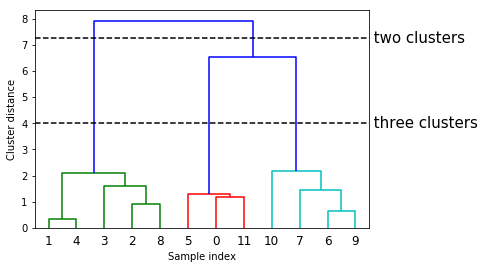

In [6]:
# Import the dendrogram function and the ward clustering function from SciPy
from scipy.cluster.hierarchy import dendrogram, ward

X, y = make_blobs(random_state=0, n_samples=12)

# Apply the ward clustering to the data array X
# The SciPy ward function returns an array that specifies the distances
# bridged when performing agglomerative clustering
linkage_array = ward(X)

# Now we plot the dendrogram for the linkage_array containing the distances
# between clusters
dendrogram(linkage_array)

# Mark the cuts in the tree that signify two or three clusters
ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [7.25, 7.25], '--', c='k')
ax.plot(bounds, [4, 4], '--', c='k')

ax.text(bounds[1], 7.25, ' two clusters', va='center', fontdict={'size': 15})
ax.text(bounds[1], 4, ' three clusters', va='center', fontdict={'size': 15})
plt.xlabel("Sample index")
plt.ylabel("Cluster distance")

The dendrogram shows data points as points on the bottom (numbered from 0 to 11). Then, a tree is plotted with these points (representing single-point clusters) as the leaves, and a new node parent is added for each two clusters that are joined.

Reading from bottom to top, the data points 1 and 4 are joined first. Next, points 6 and 9 are joined into a cluster, and so on. At the top level, there are two branches, one consisting of points 11, 0, 5, 10, 7, 6, and 9, and the other consisting of points 1, 4, 3, 2, and 8. These correspond to the two largest clusters in the lefthand side of the plot.

The y-axis in the dendrogram doesn’t just specify when in the agglomerative algorithm two clusters get merged. The length of each branch also shows how far apart the merged clusters are. The longest branches in this dendrogram are the three lines that are marked by the dashed line labeled “three clusters.” That these are the longest branches indicates that going from three to two clusters meant merging some very far-apart points. We see this again at the top of the chart, where merging the two remaining clusters into a single cluster again bridges a relatively large distance.

Unfortunately, agglomerative clustering still fails at separating complex shapes like the two_moons dataset.